# **Sales Forcasting**
![alt text](https://s3.amazonaws.com/aurochssolutions.com-images/sales_forecasting_01_10ee95f93b.jpeg)

# Team :


* Nour Sameh El Barbary
*
*
*
*


# Importing libraries and Reading Data

In [ ]:
import pandas as pd
import numpy as np


import time
from sklearn.ensemble import GradientBoostingRegressor

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno as msno
from tabulate import tabulate

# Check if the data is normally distributed
from scipy.stats import shapiro, boxcox
from sklearn.preprocessing import PowerTransformer
import statsmodels.api as sm

# Preprocessing
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler, MultiLabelBinarizer, LabelEncoder
import re

# For modeling
from scipy import stats
from scipy.stats import norm
from scipy.stats.mstats import winsorize
from geopy.geocoders import Nominatim

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import spearmanr

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb

from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline


import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import uniform, randint
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
import time
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor

In [ ]:
df = pd.read_csv('retail_store_inventory.csv')

In [ ]:
df.head()

Date Store ID Product ID     Category Region  Inventory Level  \
0  2022-01-01     S001      P0001    Groceries  North              231   
1  2022-01-01     S001      P0002         Toys  South              204   
2  2022-01-01     S001      P0003         Toys   West              102   
3  2022-01-01     S001      P0004         Toys  North              469   
4  2022-01-01     S001      P0005  Electronics   East              166   

   Units Sold  Units Ordered  Demand Forecast  Price  Discount  \
0         127             55           135.47  33.50        20   
1         150             66           144.04  63.01        20   
2          65             51            74.02  27.99        10   
3          61            164            62.18  32.72        10   
4          14            135             9.26  73.64         0   

  Weather Condition  Holiday/Promotion  Competitor Pricing Seasonality  
0             Rainy                  0               29.69      Autumn  
1             Sunny                  0               66.16      Autumn  
2             Sunny                  1               31.32      Summer  
3            Cloudy                  1               34.74      Autumn  
4             Sunny                  0               68.95      Summer

#Data Description

* **Date:** The specific date of the record in the format YYYY-MM-DD.

* **Store ID:** A unique identifier for each store (e.g., S001).

* **Product ID:** A unique identifier for each product (e.g., P0001).

* **Category:** The type or category of the product (e.g., Groceries, Toys, Electronics).

* **Region:** The geographical location of the store (e.g., North, South, East, West).

* **Inventory Level:** The number of product units available in stock on the given date.

* **Units Sold:** The total number of product units sold on the given date.

* **Units Ordered:** The number of product units ordered by customers (may differ from units sold).

* **Demand Forecast:** The system's predicted number of product units expected to be sold.

* **Price:** The selling price of a single unit of the product.

* **Discount:** The discount applied to the product, possibly as a fixed amount or percentage.

* **Weather Condition:** The weather on the given date (e.g., Sunny, Rainy, Cloudy).

* **Holiday/Promotion:** Indicates whether the date was a holiday or had a promotional event (1 = Yes, 0 = No).

* **Competitor Pricing:** The price of a similar or the same product offered by competitors on the same day.

* **Seasonality:** The season in which the sale occurred (e.g., Summer, Autumn).

# **Task 1: Explore and Familiarize with the Dataset(EDA):**


In [ ]:
df.shape

(73100, 15)

* Dataset consists of **```73100 rows```** and **```15 columns```**.

##1 Dive into the dataset to uncover any peculiarities or unexpected patterns that may influence

In [ ]:
df.head().style.background_gradient('Blues')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

In [ ]:
df.dtypes

Date                   object
Store ID               object
Product ID             object
Category               object
Region                 object
Inventory Level         int64
Units Sold              int64
Units Ordered           int64
Demand Forecast       float64
Price                 float64
Discount                int64
Weather Condition      object
Holiday/Promotion       int64
Competitor Pricing    float64
Seasonality            object
dtype: object

In [ ]:
# There are no missing values across any columns.
# Data types:
# - Categorical/Object: 7 columns (e.g., Store ID, Category, Weather Condition)
# - Numerical: 8 columns (5 int64, 3 float64)
# The 'Date' column is currently of type object and may need to be converted to datetime for time series analysis.


In [ ]:
df.nunique()

Date                    731
Store ID                  5
Product ID               20
Category                  5
Region                    4
Inventory Level         451
Units Sold              498
Units Ordered           181
Demand Forecast       31608
Price                  8999
Discount                  5
Weather Condition         4
Holiday/Promotion         2
Competitor Pricing     9751
Seasonality               4
dtype: int64

In [ ]:
df.isnull().sum()

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

In [ ]:
df.describe()

Inventory Level    Units Sold  Units Ordered  Demand Forecast  \
count     73100.000000  73100.000000   73100.000000     73100.000000   
mean        274.469877    136.464870     110.004473       141.494720   
std         129.949514    108.919406      52.277448       109.254076   
min          50.000000      0.000000      20.000000        -9.990000   
25%         162.000000     49.000000      65.000000        53.670000   
50%         273.000000    107.000000     110.000000       113.015000   
75%         387.000000    203.000000     155.000000       208.052500   
max         500.000000    499.000000     200.000000       518.550000   

              Price      Discount  Holiday/Promotion  Competitor Pricing  
count  73100.000000  73100.000000       73100.000000        73100.000000  
mean      55.135108     10.009508           0.497305           55.146077  
std       26.021945      7.083746           0.499996           26.191408  
min       10.000000      0.000000           0.000000            5.030000  
25%       32.650000      5.000000           0.000000           32.680000  
50%       55.050000     10.000000           0.000000           55.010000  
75%       77.860000     15.000000           1.000000           77.820000  
max      100.000000     20.000000           1.000000          104.940000

In [ ]:
df.describe(include='O').T

count unique         top   freq
Date               73100    731  2024-01-01    100
Store ID           73100      5        S001  14620
Product ID         73100     20       P0001   3655
Category           73100      5   Furniture  14699
Region             73100      4        East  18349
Weather Condition  73100      4       Sunny  18290
Seasonality        73100      4      Spring  18317

converting column date to date time format and extracting day month year

Engineer time-based features

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
# Extract date-related features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek  # Monday=0, Sunday=6
df['WeekdayName'] = df['Date'].dt.day_name()

In [ ]:
df.head()

Date Store ID Product ID     Category Region  Inventory Level  \
0 2022-01-01     S001      P0001    Groceries  North              231   
1 2022-01-01     S001      P0002         Toys  South              204   
2 2022-01-01     S001      P0003         Toys   West              102   
3 2022-01-01     S001      P0004         Toys  North              469   
4 2022-01-01     S001      P0005  Electronics   East              166   

   Units Sold  Units Ordered  Demand Forecast  Price  Discount  \
0         127             55           135.47  33.50        20   
1         150             66           144.04  63.01        20   
2          65             51            74.02  27.99        10   
3          61            164            62.18  32.72        10   
4          14            135             9.26  73.64         0   

  Weather Condition  Holiday/Promotion  Competitor Pricing Seasonality  Year  \
0             Rainy                  0               29.69      Autumn  2022   
1             Sunny                  0               66.16      Autumn  2022   
2             Sunny                  1               31.32      Summer  2022   
3            Cloudy                  1               34.74      Autumn  2022   
4             Sunny                  0               68.95      Summer  2022   

   Month  Day  DayOfWeek WeekdayName  
0      1    1          5    Saturday  
1      1    1          5    Saturday  
2      1    1          5    Saturday  
3      1    1          5    Saturday  
4      1    1          5    Saturday

In [ ]:
df.drop('Date', axis=1, inplace=True)


### check for outliers

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64' ,'int32']).columns

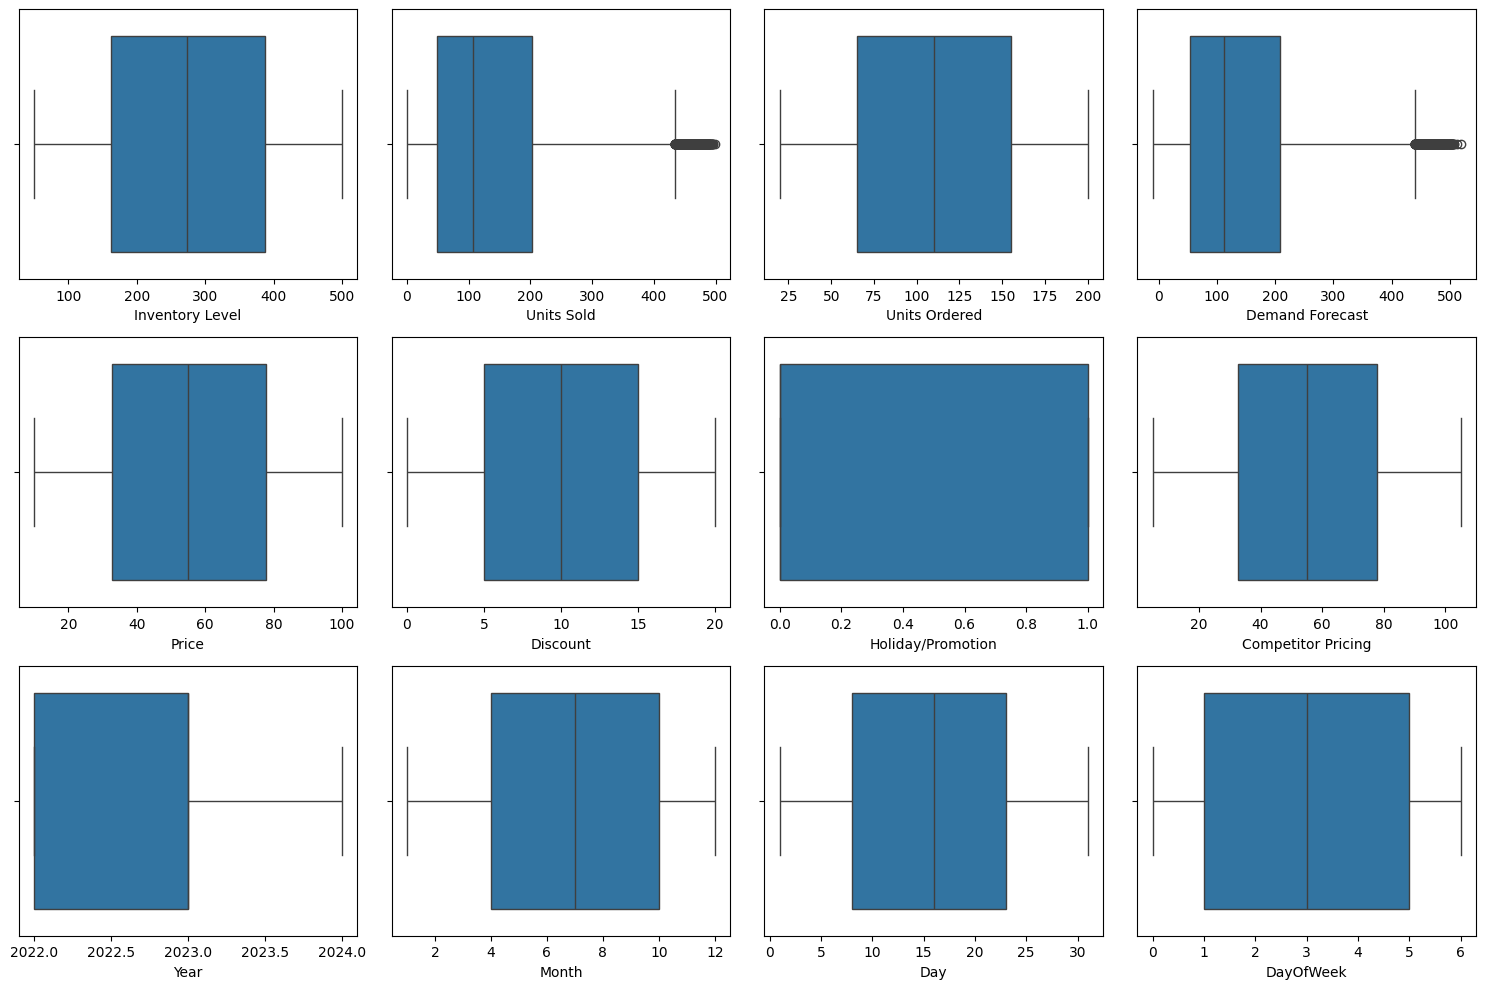

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df[col])
plt.tight_layout()
plt.show()

we have some outliers in unit sold and demand forcast

In [ ]:

# Boxplot for Units Sold
fig = px.box(df, y='Units Sold', title='Boxplot - Units Sold')
fig.show()

# Boxplot for Demand Forecast
fig = px.box(df, y='Demand Forecast', title='Boxplot - Demand Forecast')
fig.show()


In [ ]:
print(df[df['Units Sold'] <= 0])
print(df[df['Demand Forecast'] <= 0])

      Store ID Product ID     Category Region  Inventory Level  Units Sold  \
63        S004      P0004    Groceries   West              437           0   
159       S003      P0020  Electronics   East              155           0   
303       S001      P0004  Electronics  North              209           0   
1107      S001      P0008     Clothing   West              432           0   
1398      S005      P0019    Groceries   West               65           0   
...        ...        ...          ...    ...              ...         ...   
71239     S002      P0020     Clothing   West              135           0   
72053     S003      P0014         Toys  South              421           0   
72078     S004      P0019  Electronics   East              301           0   
72463     S004      P0004  Electronics  North              101           0   
72917     S001      P0018     Clothing   East              303           0   

       Units Ordered  Demand Forecast  Price  Discount Weather 

In [ ]:
non_positive_units_sold = df[df['Units Sold'] <= 0]
non_positive_demand_forecast = df[df['Demand Forecast'] <= 0]

# Print out the rows with non-positive values (if any)
print(non_positive_units_sold)
print(non_positive_demand_forecast)

      Store ID Product ID     Category Region  Inventory Level  Units Sold  \
63        S004      P0004    Groceries   West              437           0   
159       S003      P0020  Electronics   East              155           0   
303       S001      P0004  Electronics  North              209           0   
1107      S001      P0008     Clothing   West              432           0   
1398      S005      P0019    Groceries   West               65           0   
...        ...        ...          ...    ...              ...         ...   
71239     S002      P0020     Clothing   West              135           0   
72053     S003      P0014         Toys  South              421           0   
72078     S004      P0019  Electronics   East              301           0   
72463     S004      P0004  Electronics  North              101           0   
72917     S001      P0018     Clothing   East              303           0   

       Units Ordered  Demand Forecast  Price  Discount Weather 

In [ ]:
unique_units_sold = df['Units Sold'].unique()

unique_units_sold

array([127, 150,  65,  61,  14, 128,  97, 312, 175,  28,  24,  42,  12,
       369, 255, 246, 151, 257,  99, 104, 141, 182,  63, 156, 250, 393,
        29,   9, 126,  13,  25, 283, 359, 129, 373, 160,  15, 101, 147,
         4,  77,  31, 325, 163,  34,  47, 232,  17, 260, 347,  70, 249,
       370, 271, 180, 344,   0, 200, 382, 190,  51,  40,  46,  56, 181,
        94,   8, 172,  68, 298,  64, 300,  21, 176, 131, 317,  87, 238,
       171,  11, 371, 107, 106,  81, 464, 116,  58,  74,  54,  39, 198,
       165, 174, 343,  71, 157,  88, 273, 247, 197, 374, 154, 236, 278,
        27, 124, 479,  78, 114,   2,   7, 282,  93,  85, 136, 140,  79,
         1, 203, 368, 286,  69,  52, 109,  50,  22,  45,  89, 209, 115,
        90, 206, 328, 155, 184,  16, 178, 256,  67,  84, 333,  83, 241,
        60, 437, 377, 183,   5, 199, 214, 177, 217,   3,  18, 242, 228,
        20, 193, 118,  96,  48, 130, 313, 352, 265, 191, 185, 143, 270,
       233, 187, 234, 213,  55, 100, 353, 342, 289, 179,  43, 39

In [ ]:
df['Units Sold'] = np.log1p(df['Units Sold'])


Correlation Analysis for Numeric Columns



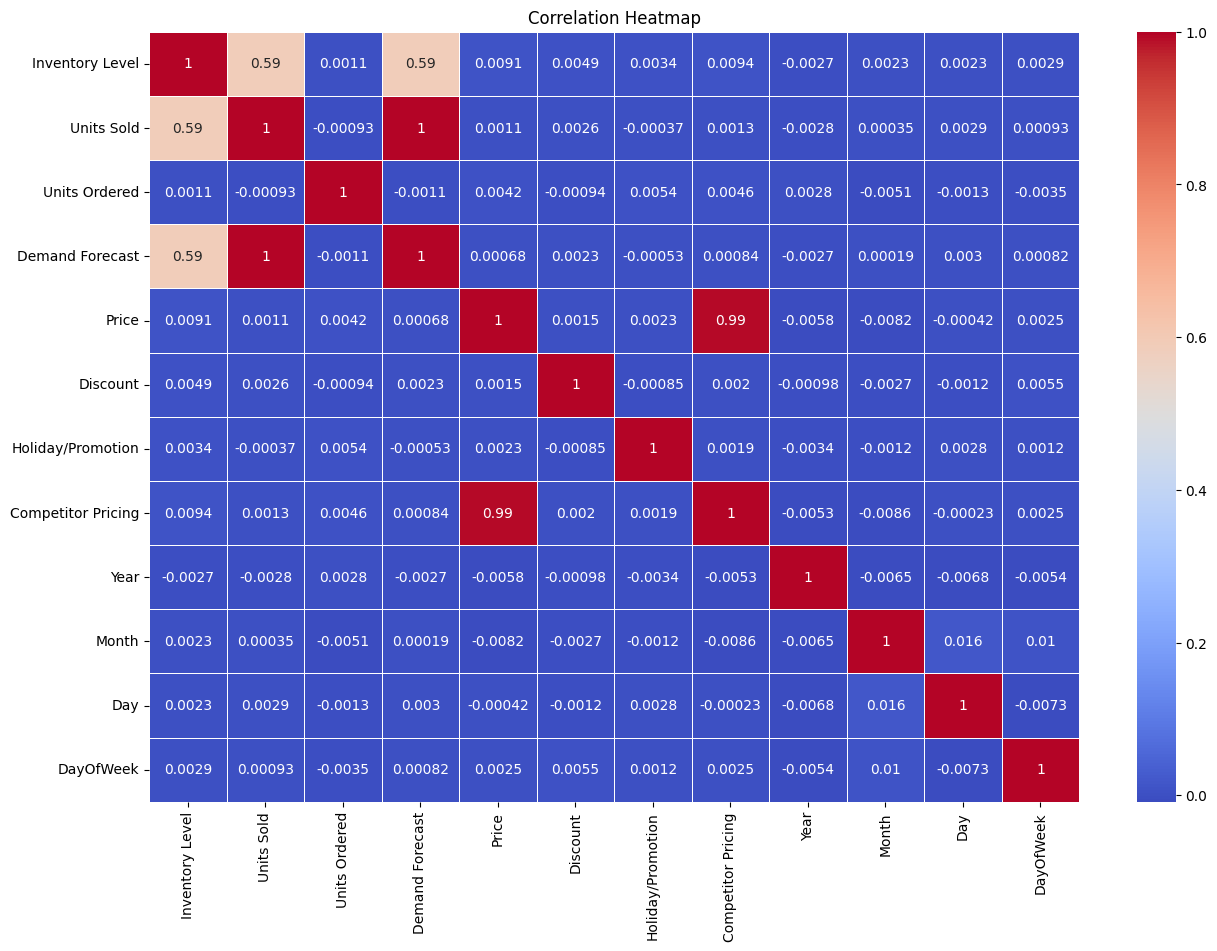

In [ ]:
correlation = df[numeric_cols].corr()

# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

* we have a strong correlation between price and competitor pricing
* inventory level correlates with demand forecast and units sold


## Key Patterns & Trends

In [ ]:
df.groupby('Category')['Units Sold'].mean().sort_values(ascending=False)


Category
Furniture      137.765630
Groceries      136.916159
Clothing       136.685765
Toys           135.934235
Electronics    135.006680
Name: Units Sold, dtype: float64

 The average number of units sold across different product categories shows some interesting insights:

* Furniture leads with an average of 137.77 units sold, suggesting high customer demand or larger order volumes in this category.

* Groceries and Clothing follow closely, with averages of 136.92 and 136.69 units respectively, reflecting steady and consistent demand.

* Toys and Electronics have slightly lower averages (135.93 and 135.01), but the difference is marginal—indicating a generally balanced sales performance across categories.

* 📝 Insight:
Despite minor differences, the overall similarity in averages hints at a fairly uniform sales distribution. However, targeted marketing or promotions could help uplift underperforming categories like Electronics.

In [ ]:
df.groupby('Region')['Units Sold'].sum().sort_values(ascending=False)


Region
East     2511265
South    2507799
North    2484966
West     2471552
Name: Units Sold, dtype: int64

The East region has the highest total sales, but the difference compared to other regions is relatively small.

All 4 regions show comparable performance, indicating a well-distributed customer base and sales reach.

The West region has the lowest sales, though not drastically behind. It might benefit from localized promotions or inventory adjustments.





### some visualizations

In [ ]:
#Time Series Trends – Units Sold Over Time
fig = px.line(df.groupby(['Year', 'Month'])['Units Sold'].sum().reset_index(),
              x='Month', y='Units Sold', color='Year',
              title='Monthly Units Sold per Year')
fig.show()


In [ ]:
#Distribution of Inventory Levels
fig = px.histogram(df, x='Inventory Level', nbins=50, title='Distribution of Inventory Level')
fig.show()


In [ ]:
# Category-wise Sales
fig = px.box(df, x='Category', y='Units Sold', color='Category', title='Units Sold by Category')
fig.show()


In [ ]:
#Sales by Region
region_sales = df.groupby('Region')['Units Sold'].sum().reset_index()
fig = px.bar(region_sales, x='Region', y='Units Sold', title='Total Units Sold by Region', color='Region')
fig.show()


In [ ]:
#Impact of Weather on Units Sold
weather_sales = df.groupby('Weather Condition')['Units Sold'].mean().reset_index()
fig = px.bar(weather_sales, x='Weather Condition', y='Units Sold',
             title='Average Units Sold by Weather Condition', color='Weather Condition')
fig.show()


In [ ]:
#Discount vs Units Sold
fig = px.scatter(df, x='Discount', y='Units Sold', color='Category',
                 title='Discount vs Units Sold by Category', trendline='ols')
fig.show()
